# README
This notebook is used to split the dataset.

In [4]:
import numpy as np
import pickle
import pandas as pd
import numpy as np
import random
import json
import os
from batteryml.data.battery_data import BatteryData
import matplotlib.pyplot as plt
from tqdm import tqdm
random.seed(2024)
np.random.seed(2024)

# XJTU dataset

In [5]:
# Here is the train_ids provided by BatteryML
data_path = '../dataset/XJTU'
tmp_files = os.listdir(data_path)
life_labels = json.load(open('../dataset/XJTU_labels.json'))
files = [i for i in tmp_files if i in life_labels]

test_ratio = 0.2
testing_set = random.sample(files, int(len(files)*0.2))
training_set = [i for i in files if i not in testing_set]

val_ratio = 0.2

validation_set= random.sample(training_set, int(len(training_set)*0.25))
training_set = [i for i in training_set if i not in validation_set]


assert len(training_set) + len(validation_set) + len(testing_set) == len(files)

print(f'training_set: {len(training_set)} {training_set}')
print(f'Val set: {len(validation_set)} {validation_set}')
print(f'Test set: {len(testing_set)} {testing_set}')

training_set: 15 ['XJTU_2C_battery-6.pkl', 'XJTU_2C_battery-2.pkl', 'XJTU_3C_battery-2.pkl', 'XJTU_3C_battery-3.pkl', 'XJTU_3C_battery-10.pkl', 'XJTU_3C_battery-13.pkl', 'XJTU_3C_battery-7.pkl', 'XJTU_3C_battery-15.pkl', 'XJTU_3C_battery-4.pkl', 'XJTU_3C_battery-5.pkl', 'XJTU_3C_battery-11.pkl', 'XJTU_3C_battery-6.pkl', 'XJTU_2C_battery-1.pkl', 'XJTU_2C_battery-8.pkl', 'XJTU_2C_battery-4.pkl']
Val set: 4 ['XJTU_3C_battery-14.pkl', 'XJTU_3C_battery-8.pkl', 'XJTU_2C_battery-3.pkl', 'XJTU_2C_battery-7.pkl']
Test set: 4 ['XJTU_3C_battery-12.pkl', 'XJTU_3C_battery-1.pkl', 'XJTU_2C_battery-5.pkl', 'XJTU_3C_battery-9.pkl']


# Data check

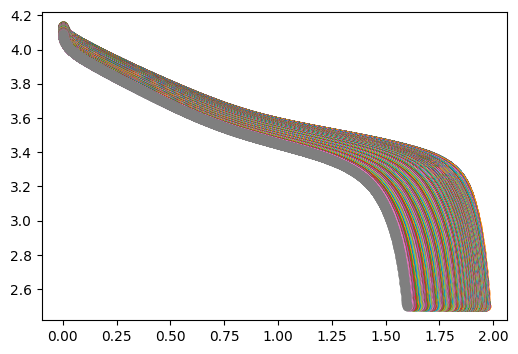

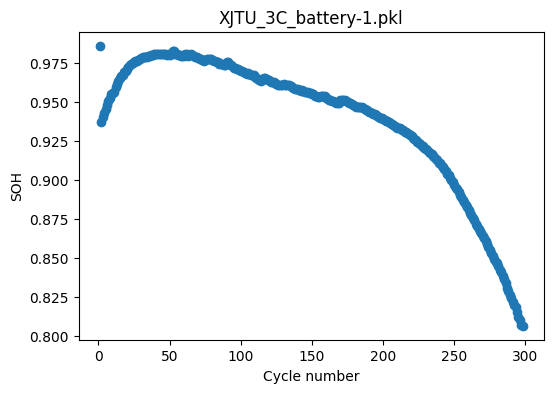

In [7]:
cell_name = 'XJTU_3C_battery-1.pkl'
data = pickle.load(open(f'../dataset/XJTU/{cell_name}', 'rb'))
cycle_data = data['cycle_data']
nominal_capacity = data['nominal_capacity_in_Ah']
need_keys = ['current_in_A', 'voltage_in_V', 'charge_capacity_in_Ah', 'discharge_capacity_in_Ah', 'time_in_s']
SOC_interval = data['SOC_interval'] # get the charge and discharge soc interval
SOC_interval = SOC_interval[1] - SOC_interval[0]
fig = plt.figure(figsize=(6,4))
total_xs = []
total_SOHs = []
for correct_cycle_index, sub_cycle_data in enumerate(cycle_data):
    soh = max(sub_cycle_data['discharge_capacity_in_Ah']) / nominal_capacity / SOC_interval
    total_SOHs.append(soh)
    total_xs.append(correct_cycle_index+1)
    cycle_df = pd.DataFrame()
    for key in need_keys:
        cycle_df[key] = sub_cycle_data[key]    
    cycle_df['cycle_number'] = correct_cycle_index + 1
    cycle_df['cycle_number'] = correct_cycle_index + 1
    cycle_df.loc[cycle_df['charge_capacity_in_Ah']<0] = np.nan
    cycle_df.bfill(inplace=True) # deal with NaN

    
    
    cycle_df = cycle_df.loc[cycle_df['current_in_A']<0]
    voltage_records = cycle_df['voltage_in_V'].values
    current_records = cycle_df['current_in_A'].values
    charge_capacity_records = cycle_df['charge_capacity_in_Ah'].values
    discharge_capacity_records = cycle_df['discharge_capacity_in_Ah'].values
    plt.plot(discharge_capacity_records, voltage_records, marker='o')

plt.show()

fig = plt.figure(figsize=(6,4))
plt.scatter(total_xs, total_SOHs)
plt.title(cell_name)
plt.xlabel('Cycle number')
plt.ylabel('SOH')
plt.show()